In [47]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_22/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<Figure size 576x432 with 0 Axes>

[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# PRACTICA GUIADA: Regresión lineal con predictores cualitativos

# 1 **Introducción**
1.Introduccón al dataset "bikeshare" 
* Leyendo los datos
* Visualizando los datos

2.Regresión lineal
* Forma de regresión lineal
* Construir un modelo de regresión lineal
* Uso del modelo para la predicción
* ¿Es importante la escala de las features?

3.Trabajando con múltiples features
* Visualizando los datos 
* Agregando más features al modelo

4.Eligiendo entre modelos
* Selección de features
* Métricas de evaluación para problemas de regresión
* Comparación de modelos con sets de entrenamiento/test y RMSE
* Comparando RMSE de prueba con RMSE nulo (baseline)
       
5.Creando features
* Manejo de feactures categóricas
* Ingeniería de features



**===========================================================================================**

### 1.1 Importando datos

Vamos a trabajar con un conjunto de datos sobre alquileres de bicicletas que fue utilizado en un concurso de Kaggle.


Se proporcionan datos de alquiler por hora que abarcan dos años. El conjunto de entrenamiento se compone de los primeros 19 días de cada mes, mientras que el conjunto de test es del día 20 al final del mes.

**_Queremos predecir el número total de bicicletas alquiladas durante cada hora cubierta por el conjunto de test, utilizando sólo la información disponible en el set de entrenamiento._**


**CAMPOS DEL DATASET**

**datetime** - dia y hora - timestamp

**season** -  1 = primavera, 2 = verano, 3 = otoño, 4 = invierno

**holiday** - feriado

**workingday** - día de la semana

**weather** - 

              1: Clear, Few clouds, Partly cloudy, Partly cloudy
              2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
              3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,
                 Light Rain + Scattered clouds
              4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp** - temperatura en Celsius

**atemp** - sensación térmica

**humidity** - humedad

**windspeed** - velocidad del viento

**casual** - ususarios no-registrados (number of non-registered user rentals initiated)

**registered** - ususarios registrados (number of registered user rentals initiated)

**count** - total de alquileres


In [48]:
# Leemos los datos y seteamos el datetime como índice.
import pandas as pd

bikes = pd.read_csv('../Data/bikes.csv', index_col='datetime', parse_dates=True)

In [49]:
type(bikes)

pandas.core.frame.DataFrame

In [50]:
bikes.shape

(10886, 11)

In [51]:
bikes.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-09-10 17:00:00,3,0,0,1,30.34,34.090,55,15.0013,185,275,460
2011-01-17 17:00:00,1,1,0,1,8.20,9.850,51,12.9980,4,67,71
2012-07-14 06:00:00,3,0,0,2,26.24,29.545,78,6.0032,6,29,35
2012-11-18 11:00:00,4,0,0,1,15.58,19.695,62,19.0012,92,267,359
2011-09-05 20:00:00,3,1,0,3,27.06,29.545,94,16.9979,26,56,82
2011-09-01 02:00:00,3,0,1,1,23.78,27.275,78,6.0032,14,11,25
2012-10-09 10:00:00,4,0,1,2,18.04,21.970,75,15.0013,33,131,164
2011-10-11 12:00:00,4,0,1,2,24.60,29.545,73,11.0014,51,130,181
2012-12-10 05:00:00,4,0,1,2,15.58,19.695,94,7.0015,0,27,27


**Preguntas:**

*     ¿Qué representa cada observación?

    **Cada observacion representa a cada bicicleta que fue alquilada**
*     ¿Cuál es la variable de respuesta?

    **La variable de respuesta es la cantidad de bicicletas alquiladas, durante cada hora**
*     ¿Cuántas variables hay?

    **Hay 12 variables**

In [52]:
# Dado que "count" es un método de pandas, es conviente renombrar la columna:

bikes.rename(columns={'count':'total'}, inplace=True)

In [53]:
bikes.sample(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2012-05-16 06:00:00,2,0,1,1,22.14,25.76,94,6.0032,8,150,158
2012-04-05 20:00:00,2,0,1,1,18.04,21.97,41,12.9980,33,279,312


### 1.2 Visualización

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 16

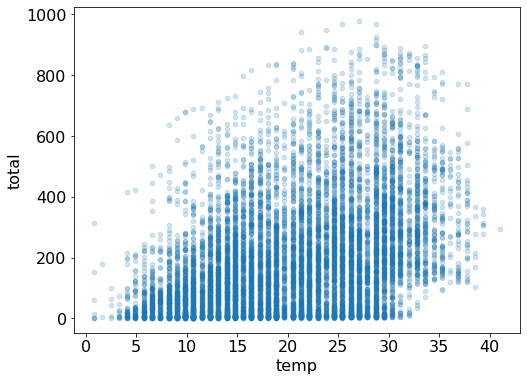

In [55]:
# Ploteamos puntos con Pandas
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2);

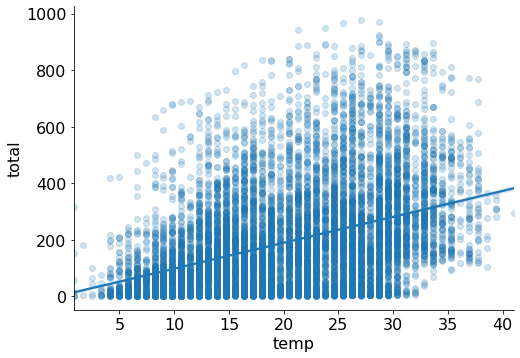

In [56]:
# Ajuste con Seaborn (modelo lineal) 
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.45,\
                                scatter_kws={'alpha':0.2});

# 2 Regresión Lineal

## 2.1 Repaso: forma del modelo lineal

![Ec. Recta](http://askingroom.com/blog/wp-content/uploads/2018/11/Ecuaci%C3%B3n-de-la-Recta-1-300x143.png)

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ es la variable dependiente (es la respuesta)
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ 
- $\beta_n$ es el coeficiente para $x_n$

Los **$\beta$** son los llamados **_Coeficientes del modelo_**

- Estos valores son estimados (o "aprendidos") durante el proceso de adaptación del modelo usando el criterio ** mínimos cuadrados **.
- Específicamente, encontramos la línea (matemáticamente) que minimiza la suma ** de cuadrados de residuos ** (o "suma de errores cuadráticos").
- Y una vez que hemos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.


![Regresión Lineal](https://cdn-images-1.medium.com/max/720/1*yLeh6JjWHenfH4zFOA3HpQ.png)

*https://medium.com/@337_73413/machine-learning-a-micro-primer-with-a-lawyers-perspective-cfe5a69c114d*

## 2.2 Construyendo el modelo de Regresión Lineal

Construir un modelo en **[Scikit-Learn](https://scikit-learn.org/stable/)** lleva 5 pasos.

1.   Preparar los datos en una **matriz de features y un array target**.

2.   Elegir una clase de modelo importando la **clase de estimador** apropiado de Scikit-Learn.

3.   Seleccionar los **hiperparámetros** del modelo **instanciando** la clase con los valores deseados

4.   Ajustar el modelo a los datos invocando el método** fit()** de la instancia del modelo.

5.   Aplicar el modelo a **nuevos datos**:


Empezamos por una regresión lineal simple!

In [57]:
# Creamos X e y

feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [58]:
type(y)

pandas.core.series.Series

In [59]:
X.shape

(10886, 1)

In [60]:
# Importamos paquete, instanciamos el estimador y fiteamos el modelo ("classic" sklearn!)

from sklearn.linear_model import LinearRegression

In [61]:
# Instanciamos el modelo

linreg = LinearRegression()

In [62]:
# Entrenamos el modelo 

linreg.fit(X, y)

LinearRegression()

In [63]:
# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

6.046212959616696
[9.17054048]


Interpretación del  **intercepto ** ($\beta_0$):

- Es el valor esperado de $ y $ cuando $ x $ = 0.
- Por lo tanto, es el número esperado de alquileres cuando la temperatura es de 0 grados Celsius.
- ** Nota: ** No siempre tiene sentido interpretar el intercepto. (¿Por qué?)

Interpretación del coeficiente de ** "temp" ** ($\beta_1$):

- Es el cambio en $ y $ dividido por cambio en $ x $, o la "pendiente".
- Así, un aumento de la temperatura de 1 grado Celsius está ** asociado con ** un aumento de alquiler de 9.17 bicicletas.
 $ \beta_1 $ sería ** negativo ** si un aumento en la temperatura se asociara con una ** disminución ** en los alquileres.

## 2.3 Usando el modelo para predecir

¿Cuántos alquileres de bicicletas podríamos predecir si la temperatura era de 25 grados Celsius?

In [64]:
# Aplicando la fórmula manualmente

test = 25

linreg.intercept_ + linreg.coef_*test

array([235.309725])

In [65]:
# usando el método del objeto
import numpy as np

test_sklearn = np.array(test).reshape(-1,1)

linreg.predict(test_sklearn)

array([235.309725])

## 2.4 ¿Es importante la escala de las features?

Digamos que la temperatura se midió en grados Fahrenheit, en lugar de Celsius. ¿Cómo afecta esto al modelo?

In [66]:
# Creamos una nueva columna para la temperatura en Fahrenheit
# ℃ = (℉ - 32)/1.8

bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


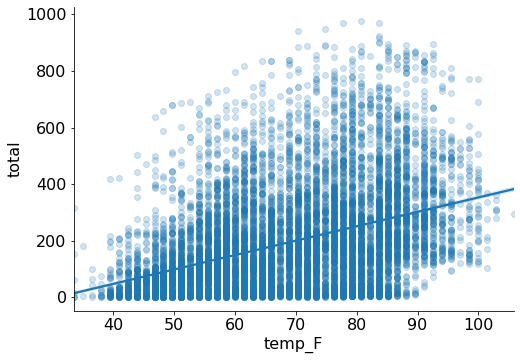

In [67]:
# Nuevamente ajustamos con Seaborn 
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.45, scatter_kws={'alpha':0.2});

In [68]:
# creamos nuevamente X e y

feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# Instanciamos el modelo y fiteamos

linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129434
[5.09474471]


In [69]:
# Convertimos 25°c a °F

test_en_f = 25 * 1.8 + 32

In [70]:
# Predicción de alquileres para 77°F

test_sklearn_en_f = np.array(test_en_f).reshape(-1,1)

linreg.predict(test_sklearn_en_f)

array([235.309725])

** Conclusión: ** La escala de las características es ** irrelevante ** para los modelos de regresión lineal. Al cambiar la escala, simplemente cambiamos nuestra ** interpretación ** de los coeficientes.

In [71]:
# borramos la columna temp_F 

bikes.drop('temp_F', axis=1, inplace=True)

## 2.5 Visualización de los datos 2

In [72]:
# Exploramos más features

feature_cols = ['temp', 'season', 'weather', 'humidity']

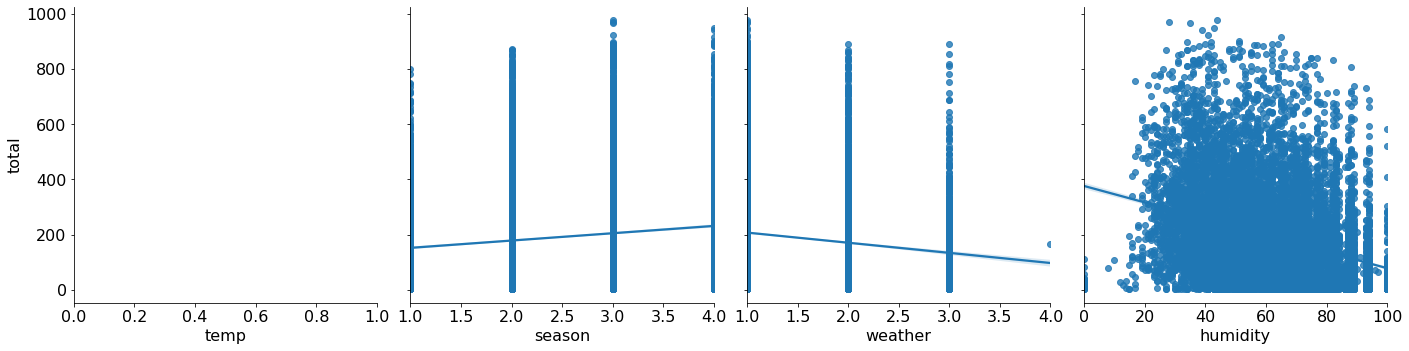

In [73]:
# plots múltiples en seaborn

sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg',\
                                                height=5, aspect=1);

In [74]:
# matriz de correlación (rangos de 1 a -1)

bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


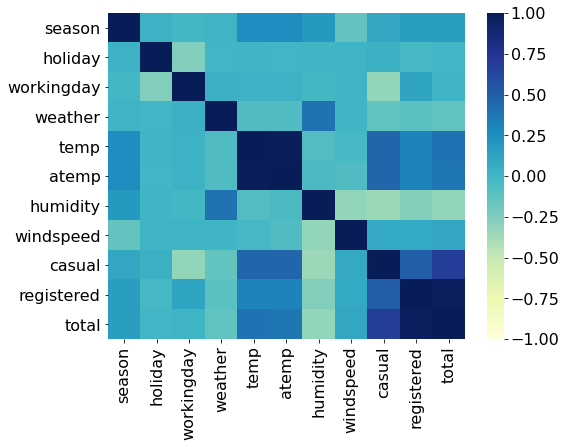

In [75]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(bikes.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

<center>__¿Qué relaciones se observan?__

Respecto a la variable objetivo, vemos una alta correlacion con "temp", "atemp","season".

Para los casos de casual y registered, refiere a los usuarios casuales y que se encuentran registrados, no tiene sentido usar estar variables, ya que obviamente la suma dara como consecuencia el valor TOTAL, pero no por eso, tienen una relacion linealmente dependiente con el valor total para los usuarios futuros.


## 2.6 Sumando más features

In [76]:
# creamos lista de features

# feature_cols = ['temp', 'humidity']

In [77]:
feature_cols

['temp', 'season', 'weather', 'humidity']

In [78]:
# creamos nuevamente X and y
X = bikes[feature_cols]
y = bikes.total

# creamos el modelo y fiteamos
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129772
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [79]:
## para observarlo mejor miramos el nombre con el coeficiente
list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477452),
 ('season', 22.538757532466736),
 ('weather', 6.6703020359237515),
 ('humidity', -3.1188733823964974)]

# 3 Eligiendo entre modelos

## 3.1 Selección de features

¿Cómo elegimos cuales features incluir en el modelo? Vamos a usar los sets de   **entrenamiento** y **test** (y eventualmente **validación cruzada**).


## 3.2 Métricas de evaluación para problemas de regresión

 Hay tres métricas de evaluación comunes para problemas de regresión:

** El error absoluto medio ** (MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

** Mean Squared Error ** (MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

** Error cuadrático medio raíz ** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

In [80]:
# Ejemplo de valores de respuesta verdaderos y predichos
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]
pred = [12, 8, 3, 4, 12, 9, 8, 12, 13]

In [81]:
# ¿Calculamos métricas a mano? ¡Por supuesto que no!

from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.4444444444444444
MSE: 2.7777777777777777
RMSE: 1.6666666666666667
R2: 0.7054973821989529


Comparando estas métricas:

- ** MAE **  es el error promedio.
- ** MSE **  "penaliza" errores grandes.
- ** RMSE **  es interpretable, tiene las mismas unidades  que la "y".
- ** $R^2$ ** es la proporción de la varianza total de $Y$ explicada por el modelo

Con excepción de R2, todas estas son ** funciones de pérdida **, porque queremos minimizarlas.

Ejemplo adicional, para ver cómo MSE / RMSE penalizan más a los errores más grandes:

In [82]:
# con los mismos valores de antes para true
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]

# nuevo set de valores para la predicción
pred = [12, 8, 3, 4, 12, 9, 8, 22, 13]

# MAE se incrementa levemente
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE y RMSE son más grandes que antes. A su vez, R2 empeora su performance.
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.8888888888888888
MSE: 7.222222222222222
RMSE: 2.6874192494328497
R2: 0.23429319371727741


## 3.3 Comparando modelos usando sets de entrenamiento/test y RMSE

### Train-Test Split

![Train-Test Split](https://cdn-images-1.medium.com/max/720/1*3g5RtdlP85EUsF-peOA1-g.png)

*https://medium.com/@hi.martinez/train-test-split-cross-validation-you-b87f662445e1*

In [83]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba RMSE.

from sklearn.model_selection import train_test_split

def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [84]:
# comparamos diferentes ensambles de features
print (train_test_rmse(['temp', 'humidity']))
print (train_test_rmse(['temp', 'humidity','windspeed']))

209.76889183066913
209.7617641005447


In [85]:
# Usando features no permitidas!!!
# Son las features que componen la variable de respuesta.
# Por definición la cantidad total de bicis prestadas es la suma de bicis prestadas a usuarios casuales y registrados
# No tiene ningún sentido hacer un modelo de esto
# Pero como la relación es tan directa, las métricas de error son bajísimas.
print (train_test_rmse(['casual', 'registered']))

2.1891181590823427e-13


In [86]:
# Chequeamos que las columnas son perfectamente dependientes.
np.all(bikes.casual + bikes.registered == bikes.total)

True

# 4 Creando Features

## 4.1 Manejo de variables categóricas

Scikit-learn espera que todos los features sean numéricos. Entonces, ¿cómo incluimos una característica categórica en nuestro modelo?

- ** Categorías ordenadas: ** transformarlas en valores numéricos que representan ese orden 
- ** Categorías no ordenadas: ** utilizar codificación ficticia (0/1) (Variables-dummy)

¿Cuáles son las características categóricas de nuestro conjunto de datos?

- ** Categorías ordenadas: ** weather (ya codificado con valores numéricos que representan el orden)
- ** Categorías no ordenadas: ** season (necesita variables dummy), holiday (Ya está codificada como dummy), workingday (ya está codificada como dummy)

Para la estación, no podemos simplemente dejar la codificación como 1 = primavera, 2 = verano, 3 = otoño y 4 = invierno, porque eso implicaría una ** relación ordenada **. En cambio, creamos ** variables dummies: **

In [88]:
# bikes['season'].sample(5)
bikes.head()

datetime
2012-01-09 03:00:00    1
2012-04-06 03:00:00    2
2012-12-08 21:00:00    4
2011-07-05 07:00:00    3
2012-08-14 02:00:00    3
Name: season, dtype: int64

In [89]:
# crear variables dummies
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# imprimimos para ver 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


Nota: El método `get_dummies` puede recibir un dataframe entero, en ese caso no modifica las variables numéricas y genera dummies para todas las categóricas que encuentre. 

Sin embargo, en realidad sólo necesitamos ** tres variables dummy (no cuatro) **, y por lo tanto vamos a dropear la primera variable dummy. 
¿Por qué?

**para evitar los problemas de colinealidad perfecta que genera esta variable extra, ademas de mejorar la performance del programa, al reducir los tiempos de procesamiento**

In [90]:
# Salteamos la primer columna
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# imprimimos 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


En general, si se tiene una feature categórica con ** k valores posibles **, se tienen que crear ** k-1 variables dummies **.

In [91]:
# Concatenar el DataFrame original y el dummy DataFrame (axis = 0 significa filas, axis = 1 significa columnas)
bikes = pd.concat([bikes, season_dummies], axis=1)

# imprimimos 5 filas cualquieras
bikes.sample(n=5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2012-04-14 19:00:00,2,0,0,2,24.60,31.060,40,11.0014,163,296,459,1,0,0
2012-01-11 15:00:00,1,0,1,2,13.94,17.425,87,6.0032,6,73,79,0,0,0
2011-10-04 19:00:00,4,0,1,1,21.32,25.000,68,15.0013,35,310,345,0,0,1
2012-10-11 08:00:00,4,0,1,1,15.58,19.695,46,26.0027,25,773,798,0,0,1
2011-06-16 07:00:00,2,0,1,3,22.96,26.515,78,11.0014,16,172,188,1,0,0


In [92]:
# Incluímos variables dummies

feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)


list(zip(feature_cols, linreg.coef_))

[('temp', 11.18640586357579),
 ('season_2', -3.3905430997178936),
 ('season_3', -41.7368607131706),
 ('season_4', 64.41596146824206),
 ('humidity', -2.819481636259651)]

¿Cómo interpretamos los coeficientes de season? ** se miden con respecto a la línea de base (spring) **:

- Manteniendo todas las demás características fijas, ** summer ** se asocia con una ** disminución de alquiler de 3.39 bicicletas ** en comparación con spring.
- Manteniendo todas las demás características fijas, ** fall ** se asocia con una ** disminución de alquiler de 41,73 bicicletas ** en comparación con spring.
- Manteniendo todas las demás características fijas, ** winter ** se asocia con un ** aumento de alquiler de 64,4 bicicletas ** en comparación con spring.

¿Qué pasa si cambiamos la dummy que se definió como la línea de base? ¿Cambiarían los efectos?

- No, simplemente cambiaría nuestra ** interpretación ** de los coeficientes.

** Importante: ** La codificación por dummies es relevante para todos los modelos de aprendizaje automático, no sólo para los modelos de regresión lineal.

In [93]:
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

209.67252389152193


## 4.2 Conclusiones: Comparación de la regresión lineal con otros modelos

Ventajas de la regresión lineal:

- Simple de explicar
- Muy interpretable
- El entrenamiento y predicción de modelos son rápidos
- Es invariante a cambios en la escala de los features. 
- No se puede estimar por mínimos cuadrados si el número de features es mayor al número de observaciones. 


Desventajas de la regresión lineal:

- El rendimiento es (generalmente) no competitivo con los mejores métodos de aprendizaje supervisado debido a un alto sesgo

# BONUS

## Cross-Validation

![Flujo Cross-Validation](https://cdn-images-1.medium.com/max/720/1*pJ5jQHPfHDyuJa4-7LR11Q.png)

*https://medium.com/@hi.martinez/train-test-split-cross-validation-you-b87f662445e1*